In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sheet_names = pd.ExcelFile("/Users/apple/Downloads/Assingment_Dataset.xlsx").sheet_names
print(sheet_names)

['Geospatial Data', 'Satellite Details', 'News Reports', 'Historical Incidents']


In [3]:
data = pd.read_excel("/Users/apple/Downloads/Assingment_Dataset.xlsx", sheet_name='Geospatial Data')
data


,ID,Timestamp,Latitude,Longitude,Location,Movement Type,Country
0,1,2024-03-01 07:15:00,28.7041,77.1025,Border Post Alpha,Entry,Country A
1,2,2024-03-02 12:30:00,28.7042,77.1030,Border Post Alpha,Exit,Country A
2,3,2024-03-05 08:15:00,28.7043,77.1032,Border Post Alpha,Entry,Country A
3,4,2024-03-07 10:00:00,28.7044,77.1035,Border Post Alpha,Exit,Country A
4,5,2024-03-09 14:45:00,28.7045,77.1038,Border Post Alpha,Entry,Country A
5,6,2024-03-12 16:20:00,28.7046,77.1040,Border Post Bravo,Entry,Country B
6,7,2024-03-14 11:50:00,28.7047,77.1042,Border Post Bravo,Exit,Country B
7,8,2024-03-17 13:30:00,28.7048,77.1045,Border Post Bravo,Entry,Country B
8,9,2024-03-19 15:00:00,28.7049,77.1048,Border Post Bravo,Exit,Country B
9,10,2024-03-22 08:25:00,28.7050,77.1050,Border Post Bravo,Entry,Country B


In [4]:
data.size

210

In [5]:
data.isnull().sum()

ID               0
Timestamp        0
Latitude         0
Longitude        0
Location         0
Movement Type    0
Country          0
dtype: int64

In [6]:
data.columns

Index(['ID', 'Timestamp', 'Latitude', 'Longitude', 'Location', 'Movement Type',
       'Country'],
      dtype='object')

In [7]:
data.describe()

,ID,Latitude,Longitude
count,30.000000,30.000000,30.000000
mean,15.500000,28.705550,77.106380
std,8.803408,0.000880,0.002227
min,1.000000,28.704100,77.102500
25%,8.250000,28.704825,77.104575
50%,15.500000,28.705550,77.106400
75%,22.750000,28.706275,77.108225
max,30.000000,28.707000,77.110000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             30 non-null     int64         
 1   Timestamp      30 non-null     datetime64[ns]
 2   Latitude       30 non-null     float64       
 3   Longitude      30 non-null     float64       
 4   Location       30 non-null     object        
 5   Movement Type  30 non-null     object        
 6   Country        30 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.8+ KB


In [9]:
import folium
from folium.plugins import HeatMap

# Create a base map
m = folium.Map(location=[28.705, 77.106], zoom_start=10)

# Add heat map layer
heat_data = [[row['Latitude'], row['Longitude']] for index, row in data.iterrows()]
HeatMap(heat_data).add_to(m)

# Save the map
m.save("heatmap.html")

In [10]:
# Count entries and exits per border post
border_post_counts = data.groupby(['Location', 'Movement Type']).size().unstack(fill_value=0)
print(border_post_counts)

Movement Type        Entry  Exit
Location                        
Border Post Alpha        3     2
Border Post Bravo        3     3
Border Post Charlie      3     3
Border Post Delta        3     3
Border Post Echo         4     3


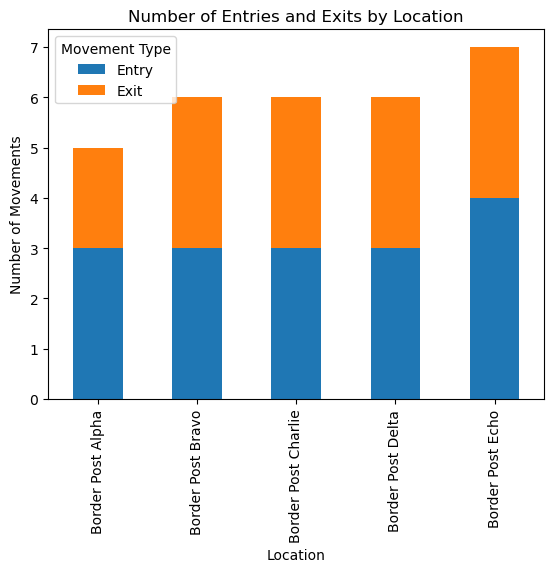

In [11]:
 border_post_counts.plot(kind='bar', stacked=True)
plt.title('Number of Entries and Exits by Location')
plt.xlabel('Location')
plt.ylabel('Number of Movements')
plt.show()

In [12]:
# Calculate the number of movements per country
country_counts = data['Country'].value_counts()
print(country_counts)

Country A    15
Country B    15
Name: Country, dtype: int64


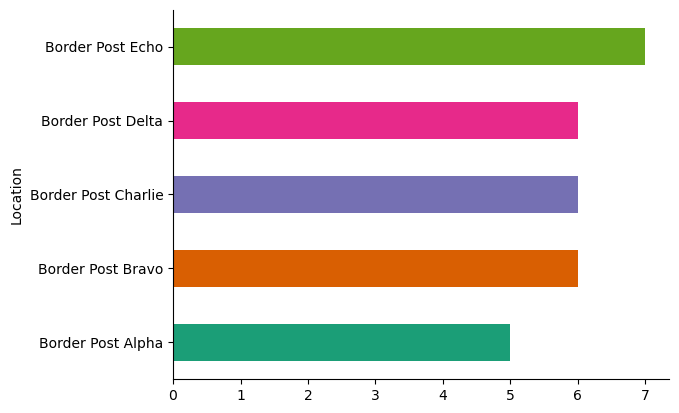

In [13]:
data.groupby('Location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

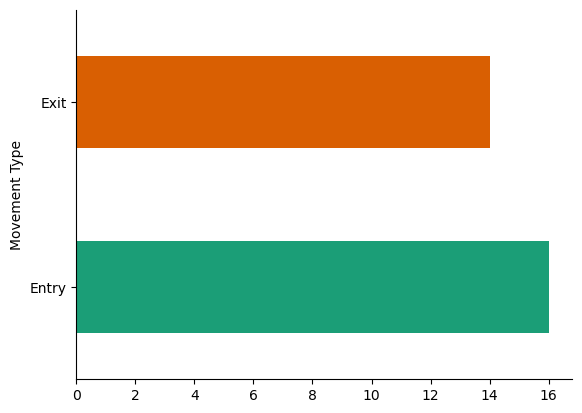

In [14]:
data.groupby('Movement Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

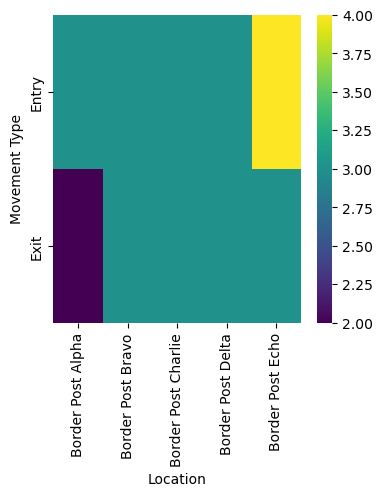

In [15]:
plt.subplots(figsize=(4, 4))
df_2dhist = pd.DataFrame({
    x_label: grp['Movement Type'].value_counts()
    for x_label, grp in data.groupby('Location')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Location')
_ = plt.ylabel('Movement Type')

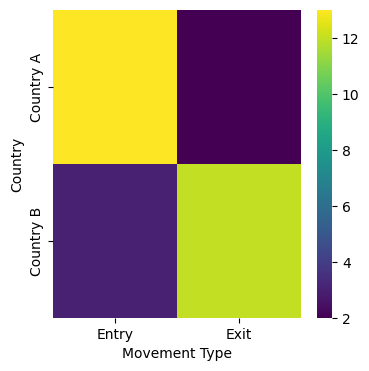

In [19]:
plt.subplots(figsize=(4, 4))
df_2dhist = pd.DataFrame({
    x_label: grp['Country'].value_counts()
    for x_label, grp in data.groupby('Movement Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Movement Type')
_ = plt.ylabel('Country')

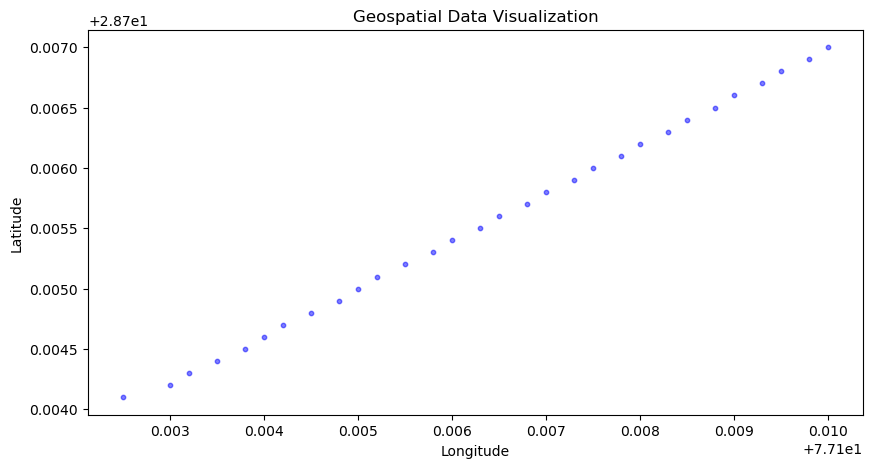

In [20]:
# Plot geospatial data using matplotlib
plt.figure(figsize=(10, 5))
plt.scatter(data['Longitude'], data['Latitude'], c='blue', s=10, alpha=0.5)
plt.title('Geospatial Data Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [18]:
# Create a heatmap using Folium
# Initialize a map centered around the average location
center_lat = data['Latitude'].mean()
center_lon = data['Longitude'].mean()
map_obj = folium.Map(location=[center_lat, center_lon], zoom_start=10)
# Prepare the data for HeatMap
heat_data = data[['Latitude', 'Longitude']].values.tolist()

# Add HeatMap layer
HeatMap(heat_data).add_to(map_obj)

# Save the heatmap as an HTML file
map_obj.save('heatmap.html')
map_obj